### Loading Packages

In [1]:
import os
import sys
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import string

import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics.pairwise import cosine_similarity
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage

import gensim
from gensim import corpora
from gensim import models
from gensim import similarities
from gensim.models import Word2Vec

### Importing the saved dataframe

In [12]:
df_recipes = pd.read_pickle('./basic_features.pkl.bz2')
df_recipes.head()

,old_id,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
id,,,,,,,,,,,,,,,,,,
424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]",aromatic basmati rice rice cooker,61,496803,2010-05-10,"[weeknight, time-to-make, course, main-ingredi...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"[rinse the rice in a fine strainer , then drai...",from the ultimate rice cooker cookbook. the a...,"[basmati rice, water, salt, cinnamon stick, gr...",5
146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",pumpkin pie a la easy,55,229619,2005-11-25,"[60-minutes-or-less, time-to-make, course, pre...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"[preheat oven to 350, combine flour , oats , b...",this is a pampered chef recipe for their stone...,"[flour, oats, brown sugar, pecans, butter, egg...",12
312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",cheesy tomato soup with potatoes,25,621626,2008-07-07,"[30-minutes-or-less, time-to-make, course, mai...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"[pour the broth & water into a large pot, add ...",after modifying another recipe i came up with ...,"[chicken broth, water, salt, black pepper, oni...",15
74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",mini tacos,15,60989,2003-10-29,"[15-minutes-or-less, time-to-make, course, mai...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"[cook hamburger until browned, drain the fat a...",these can be a easy appetizer or a light dinne...,"[wonton wrappers, hamburger, taco seasoning, s...",8
76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]",rosemary s hanky panky s,20,93444,2003-11-12,"[30-minutes-or-less, time-to-make, course, pre...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"[fry ground beef and sausage until browned, dr...",my girlfriend rosemary gave me this wonderfull...,"[ground beef, ground sausage, velveeta cheese,...",4


In [16]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178265 entries, 424415 to 263840
Data columns (total 18 columns):
old_id               178265 non-null int64
name_tokens          178265 non-null object
ingredient_tokens    178265 non-null object
steps_tokens         178265 non-null object
techniques           178265 non-null object
calorie_level        178265 non-null int64
ingredient_ids       178265 non-null object
name                 178265 non-null object
minutes              178265 non-null int64
contributor_id       178265 non-null int64
submitted            178265 non-null object
tags                 178265 non-null object
nutrition            178265 non-null object
n_steps              178265 non-null int64
steps                178265 non-null object
description          174311 non-null object
ingredients          178265 non-null object
n_ingredients        178265 non-null int64
dtypes: int64(6), object(12)
memory usage: 25.8+ MB


In [17]:
df_recipes['ingredients'].iloc[0]

['basmati rice', 'water', 'salt', 'cinnamon stick', 'green cardamom pods']

In [18]:
df_recipes['ingredient_ids'].iloc[0]

[389, 7655, 6270, 1527, 3406]

### Using the selected recipes

In [19]:
selected = pd.read_csv("./selected_recipes.csv")
selected.set_index(["id_recipe"], drop=True, inplace=True)
selected.drop(['Unnamed: 0'], axis=1, inplace=True)

In [20]:
selected.head()

,image,nationality,rating,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,minutes,original_name
id_recipe,,,,,,,,,,,,
91809,https://c0qzv5k3rl-flywheel.netdna-ssl.com/wp-...,Iranian,-1.0,432.9,62.0,27.0,48.0,15.0,21.0,5.0,75,Fesenjan
263437,https://www.196flavors.com/wp-content/uploads/...,Iranian,5.0,352.2,18.0,110.0,20.0,43.0,24.0,14.0,90,Bademjan
427705,https://toriavey.com/images/2012/01/Baghali-Po...,Iranian,-1.0,484.6,15.0,8.0,2.0,24.0,6.0,28.0,90,Baghali Polo
448277,https://i.pinimg.com/originals/ff/b6/35/ffb635...,Iranian,-1.0,666.5,45.0,62.0,10.0,13.0,91.0,31.0,130,Zereshk Polo
425696,http://www.anupskitchen.com/wp-content/uploads...,Iranian,4.0,280.5,12.0,9.0,19.0,64.0,16.0,6.0,105,Gormeh Sabzi


In [21]:
selected = selected.merge(df_recipes, left_index=True, right_index=True)

In [22]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 263437 to 424874
Data columns (total 30 columns):
image                42 non-null object
nationality          42 non-null object
rating               42 non-null float64
calories             42 non-null float64
total fat            42 non-null float64
sugar                42 non-null float64
sodium               42 non-null float64
protein              42 non-null float64
saturated fat        42 non-null float64
carbohydrates        42 non-null float64
minutes_x            42 non-null int64
original_name        42 non-null object
old_id               42 non-null int64
name_tokens          42 non-null object
ingredient_tokens    42 non-null object
steps_tokens         42 non-null object
techniques           42 non-null object
calorie_level        42 non-null int64
ingredient_ids       42 non-null object
name                 42 non-null object
minutes_y            42 non-null int64
contributor_id       42 non-null int64
submi

### Creating the vectors for calculating similarities

In [23]:
selected.loc[idx, "ingredient_ids"]

NameError: name 'idx' is not defined

In [26]:
ingredients = {}
for idx in selected.index:
    temp = dict(zip(selected.loc[idx, "ingredient_ids"],selected.loc[idx, "ingredients"]))
    ingredients.update(temp)

TypeError: zip argument #1 must support iteration

In [116]:
ingredients_matrix = np.zeros((len(df_selected),max(ingredients)+1), dtype=np.int8, order='C')

In [117]:
ingredients_matrix.shape

(44, 8022)

In [118]:
for idx in df_selected.index:
    for ing in df_selected.loc[idx,"ingredient_ids"]:
        ingredients_matrix[idx,ing] = 1

In [119]:
len(ingredients_matrix[ingredients_matrix > 0])

422

#### Creating the dish x ingredient matrix

In [121]:
df_ingredients = pd.DataFrame(data=ingredients_matrix,
                              index=df_selected.name,
                              #columns=ingredients.keys()
                              )
df_ingredients.reset_index(inplace=True)
df_ingredients.head()

,name,0,1,2,3,4,5,6,7,8,...,8012,8013,8014,8015,8016,8017,8018,8019,8020,8021
0,arancini italian rice balls,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,easy fattoush salad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,alan s tandoori chicken,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mexican tacos al pastor,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,croquetas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Testing the similarity function
(with the selected recipes)

In [125]:
ar_ingredients = df_ingredients.values

In [144]:
df_ingredients.shape

(44, 8023)

In [145]:
%%time
print(cosine_similarity(ar_ingredients[0,1:].reshape(1, -1), ar_ingredients[1,1:].reshape(1, -1)))

[[0.08333333]]
CPU times: user 1.66 ms, sys: 1.97 ms, total: 3.63 ms
Wall time: 3.44 ms


In [129]:
%%time
msim_ingredients = cosine_similarity(ar_ingredients[:,1:], ar_ingredients[:,1:])

CPU times: user 46.2 ms, sys: 18.4 ms, total: 64.7 ms
Wall time: 28.7 ms


In [130]:
msim_ingredients.shape

(44, 44)

#### Plotting the similarities Matrix

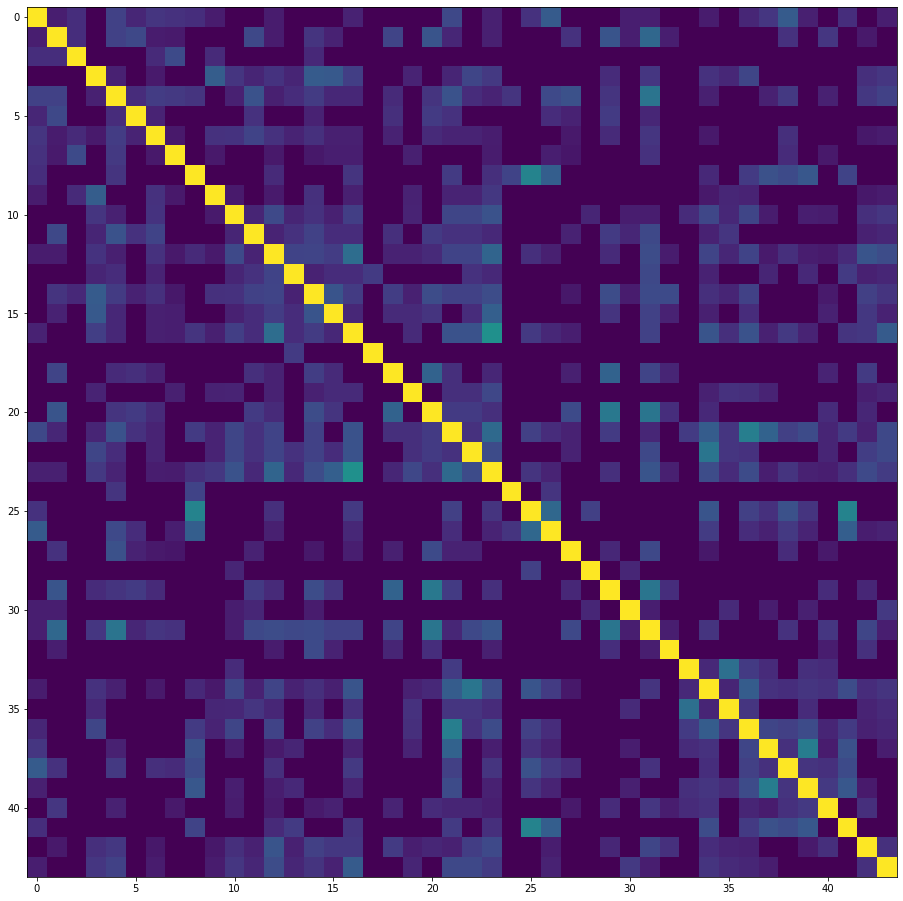

In [156]:
plt.figure(figsize=(16, 16)) 
plt.imshow(msim_ingredients, interpolation='none')
plt.show()

#### Plotting the hierarquical cluster (Dendrogram)

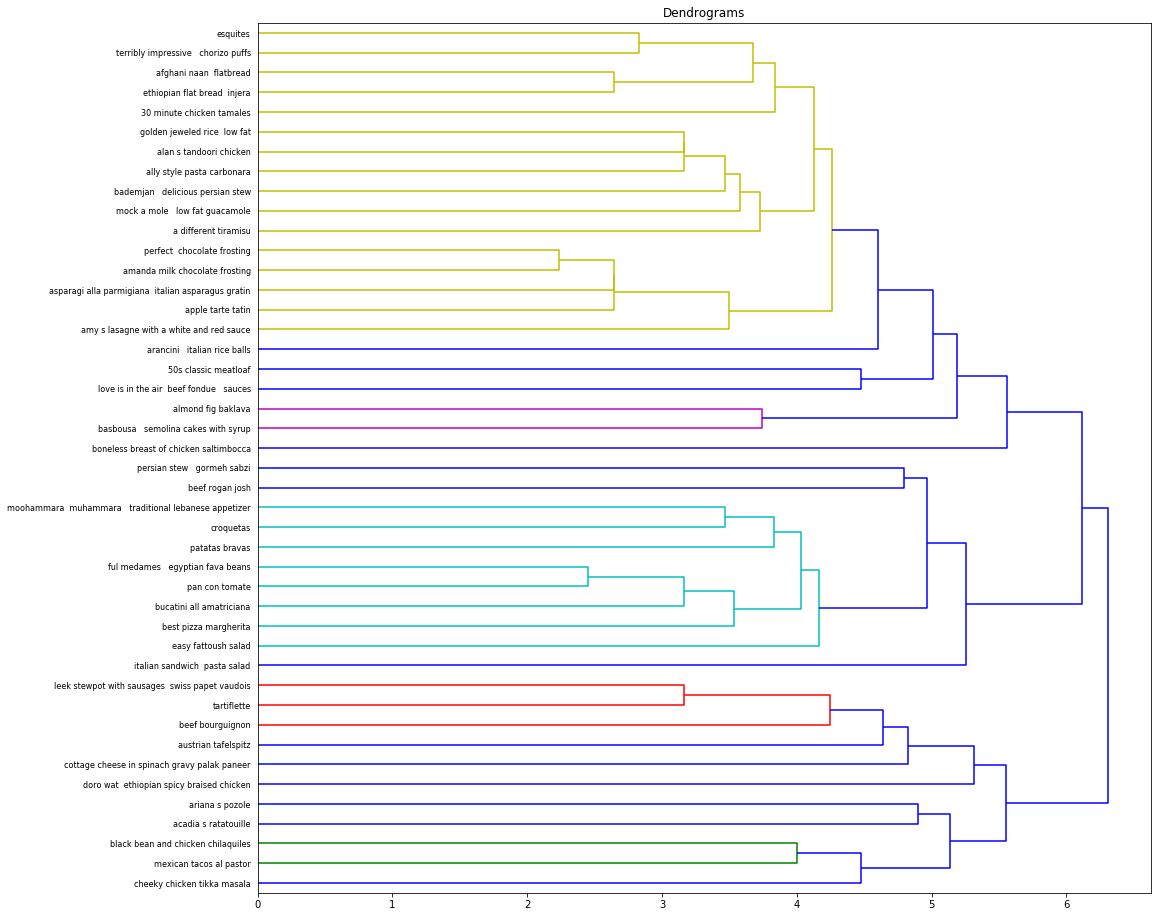

In [154]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 16))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(ar_ingredients[:,1:], method='ward'), 
                      orientation='right', 
                      labels=df_ingredients.name.values)

### Finding similar names for recipes
#### (input for the search function)

In [157]:
class Text_Cleaning_Utilities(object):
    """Tools for processing text into segments for further learning"""

    @staticmethod
    def text_to_wordlist(text, 
                         remove_stopwords=False, 
                         remove_non_letters=False, 
                         steeming=False):
        '''Split a text into a list of words'''
        #text = text.replace('-\n','')
        text = text.lower()
        if remove_non_letters:
            text = re.sub("[^-A-Za-z0-9_]", " ", text)
        list_words = word_tokenize(text)
        list_words = [w.strip(string.punctuation) for w in list_words if w not in string.punctuation]
        list_words = [w for w in list_words if len(w) > 1]
        if remove_stopwords:
            stops = set(stopwords.words("english"))
            list_words = [w for w in list_words if w not in stops]
        if steeming:
            stemmer = PorterStemmer()
            list_words = [stemmer.stem(item) for item in list_words]
        return list_words
    
    @staticmethod
    def df_to_list_of_texts(dataframe, column, 
                            remove_stopwords=False, 
                            remove_non_letters=False, 
                            steeming=False):
        clean_texts = []
        for txt_id in range(len(dataframe[column])):
            clean_texts.append(' '.join(Text_Cleaning_Utilities.text_to_wordlist(dataframe[column][txt_id],
                                                                                 remove_stopwords=remove_stopwords,
                                                                                 remove_non_letters=remove_non_letters,
                                                                                 steeming=steeming)))
            
        return clean_texts

    @staticmethod
    def df_to_list_of_tokens(dataframe, column, 
                             remove_stopwords=False, 
                             remove_non_letters=False, 
                             steeming=False):
        clean_texts = []
        for txt_id in range(len(dataframe[column])):
            clean_texts.append(Text_Cleaning_Utilities.text_to_wordlist(dataframe[column][txt_id],
                                                                        remove_stopwords=remove_stopwords,
                                                                        remove_non_letters=remove_non_letters,
                                                                        steeming=steeming))
            
        return clean_texts

In [159]:
recipes = Text_Cleaning_Utilities.df_to_list_of_texts(df_selected,
                                                      'name',
                                                      remove_stopwords=True,)

In [160]:
recipes[0:10]

['arancini italian rice balls',
 'easy fattoush salad',
 'alan tandoori chicken',
 'mexican tacos al pastor',
 'croquetas',
 'best pizza margherita',
 'acadia ratatouille',
 'boneless breast chicken saltimbocca',
 'amanda milk chocolate frosting',
 'ariana pozole']

In [163]:
vectorizer_tf = CountVectorizer(input='content', 
                               encoding='utf-8', 
                               decode_error='strict', 
                               strip_accents=None, 
                               lowercase=True, 
                               preprocessor=None, 
                               tokenizer=None, 
                               stop_words=None, 
                               #token_pattern='(?u)\b\w\w+\b',
                               ngram_range=(1,1),
                               analyzer='word', 
                               max_df=1.0, 
                               min_df=1, 
                               max_features=5000, 
                               vocabulary=None, 
                               binary=False, 
                               dtype=np.int64,
                              )

vectorizer_tfidf = TfidfVectorizer(input='content',
                                  #encoding='utf-8',
                                  decode_error='strict',
                                  strip_accents=None,
                                  lowercase=True,
                                  preprocessor=None,
                                  tokenizer=None,
                                  analyzer='word',
                                  stop_words=None,
                                  #token_pattern='(?u)\b\w\w+\b',
                                  ngram_range=(1, 1),
                                  max_df=1.0,
                                  min_df=1,
                                  max_features=5000,
                                  vocabulary=None, 
                                  binary=False, 
                                  dtype=np.int64,
                                  norm='l2',
                                  use_idf=True,
                                  smooth_idf=True,
                                  sublinear_tf=True)

In [164]:
recipes_vectors = vectorizer_tf.fit_transform(recipes)
recipes_vectors = recipes_vectors.toarray() # Numpy arrays are easy to work with
print(recipes_vectors.shape)

(44, 138)


In [166]:
recipes_vectors[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [167]:
%%time
msim_names = cosine_similarity(recipes_vectors, recipes_vectors)

CPU times: user 1.26 ms, sys: 1.11 ms, total: 2.37 ms
Wall time: 1.39 ms


In [169]:
msim_names.shape

(44, 44)

#### Plotting the similarities Matrix

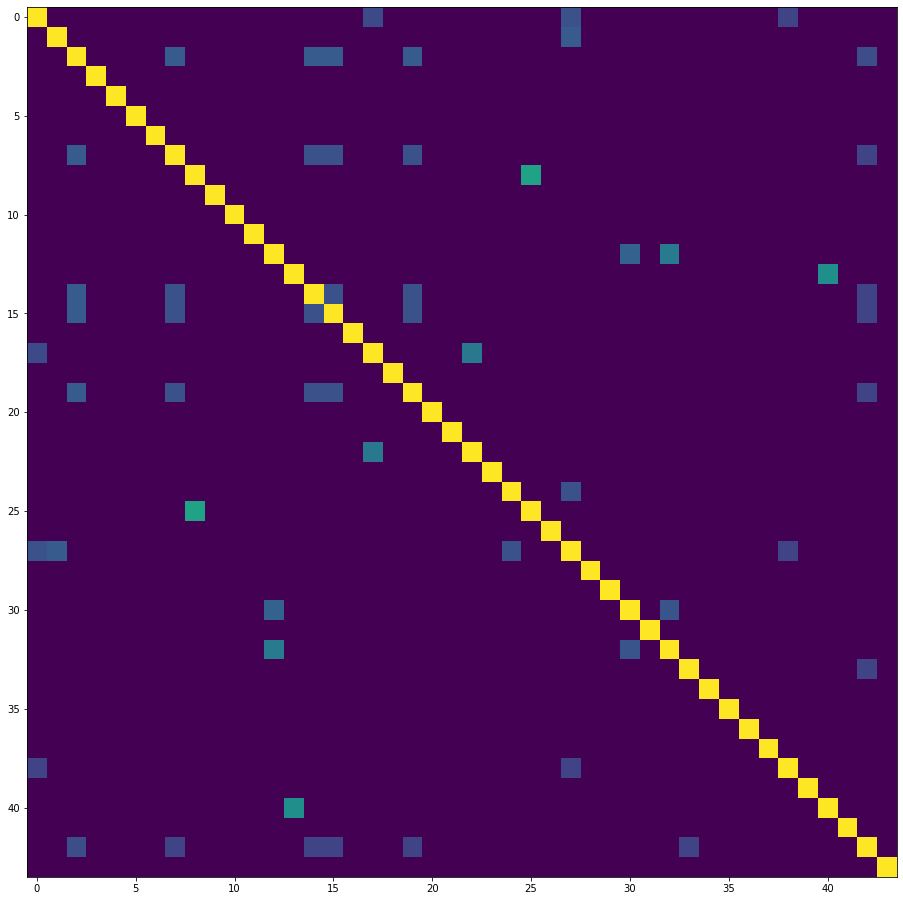

In [170]:
plt.figure(figsize=(16, 16)) 
plt.imshow(msim_names, interpolation='none')
plt.show()

#### Plotting the hierarquical cluster (Dendrogram)

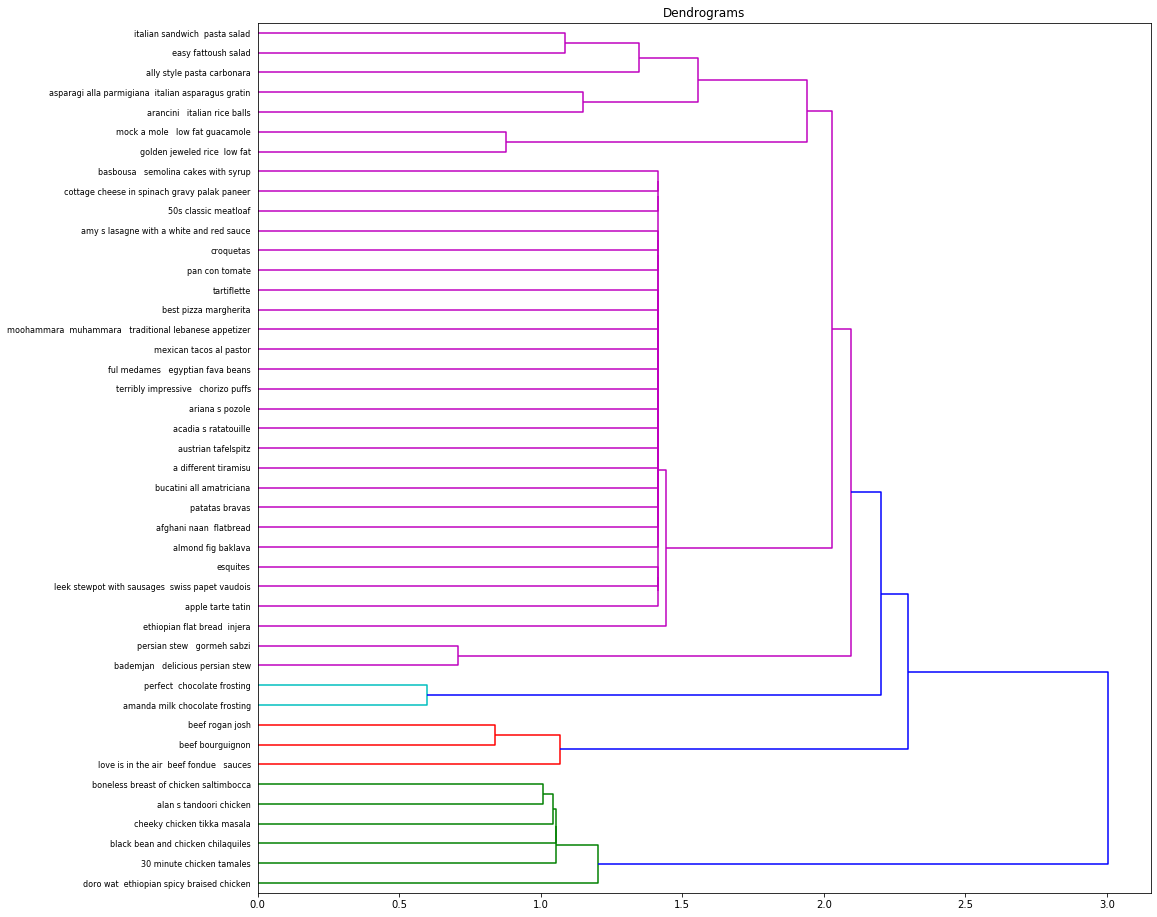

In [171]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 16))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(msim_names, method='ward'), 
                      orientation='right', 
                      labels=df_ingredients.name.values)